<a href="https://colab.research.google.com/github/tbazzi/Data-Science---Fullstack-Bootcamp/blob/master/S5_5_1_Linear_Regression_From_Scratch_EXERCICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Faire une régression Linéaire sans Scikit Learn



Rien de tel pour comprendre une descnte de gradient que de la coder entièrement. Cela peut paraitre difficile à première vue mais ne vous en faites pas, nous allons vous guider pas à pas. 

N'hésitez pas à revenir sur votre cours de Machine Learning sur les régressions linéaires pour vous rafraichir la mémoire. 

Notre but va être de coder une régression linéaire simple de type : 

`f(x) = a*x + b`

* Importez les librairies suivantes : 
  * Numpy 

In [0]:
import seaborn as sns
import pandas as pd
import numpy as np
#import matplotlib as plt
import matplotlib.pyplot as plt

* Définissez une classe `Model` qui prendra deux méthodes : 
  1. `__init__(self)` qui va vous permettre de définir votre coefficient `a` et votre constante `b`. Ces coefficients seront initialisés de manière aléatoire grâce à Numpy (cf : `np.random.randn`)
  2. `__call__(self, x)` qui va retourner `a*x + b`

In [0]:
class Model():
  def __init__(self):
    rand = np.random.randn(2)
    self.a, self.b = rand [0], rand[1]
  def __call__(self, x):
    return self.a*x+self.b

* Créez une instance de votre modèle 

In [0]:
model = Model()


* Tentez de faire une première "régression" en mettant `model(3.0)`. 
NB : Si vous n'avez pas les même valeurs que ce notebook en output, c'est normal puisque vous avez initialisé vos valeurs aléatoirement 

In [28]:
model(3)

1.3304684651591567

array([-0.35060356])

* Cette valeur correspond à une prédiction aléatoire de votre modèle. Mais nous n'avons pas de données pour le moment. Cette fois, utilisons `sklearn` pour importer des données 
  * Importez `sklearn.datasets`
  * Utilisez la fonction `load_diabetes()` pour charger le dataset du dabiète

In [30]:
from sklearn.datasets import load_diabetes
df = load_diabetes()
df.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/diabetes.h

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/

* Nous avons trop de données dans ce dataset, prenez uniquement la deuxième colonne du dataset et stockez la dans une variable `diabetes_X`

In [31]:
X = pd.DataFrame(df.data, columns = df.feature_names)
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [0]:
diabetes_X = np.array(X.bmi)


array([ 0.06169621, -0.05147406,  0.04445121, -0.01159501, -0.03638469])

* Stockez ensuite votre target dans une variable `y`

In [0]:
y = df.target


array([151.,  75., 141., 206., 135.])

* Visualisez vos données en utilisant `Matplotlib`

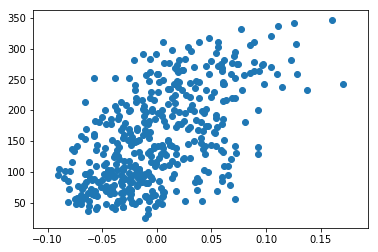

In [37]:
plt.scatter(diabetes_X, y)

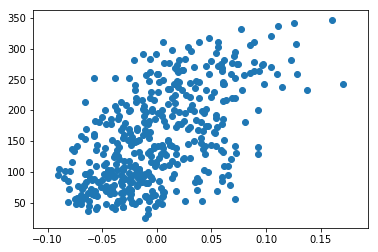

* Il faut maintenant qu'on définisse une fonction de coût. Pour une régression linéaire, nous pourrions utiliser la méthode des moindres carrés. 

Pour cela, nous allons calculer la somme des distance entre la valeurs prédite de notre modèle et la valeur réelle et nous allons en calculer la moyenne. Autrement dit, nous aurons : 

`np.mean((model(input) - y)**2)`

C'est ce qu'on peut appeler notre erreur moyenne ou l'écart moyen entre notre prédiction et les valeurs réelles. Notre but va être de minimiser cette fonction de coût. 

  * Créez donc cette fonction qu'on appellera `mse` (pour mean square error). Cette fonction prendra deux arguments `y_pred` & `y_true`

In [0]:
def mse(y_pred, y_true):
  return np.mean((y_pred - y_true)**2)

* Testez votre fonction en insérant `model(diabetes_X)` & `y` en argument 

In [39]:
mse(model(diabetes_X), y)

28891.54664151745

29186.750579682073

* Visualisez votre régression par rapport à vos points 

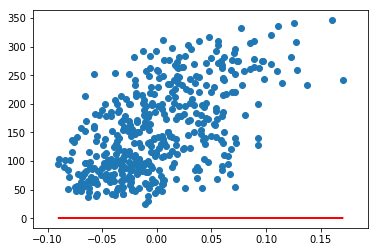

In [44]:
from scipy import stats
plt.scatter(diabetes_X, y)

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(diabetes_X,model(diabetes_X))

line = slope*diabetes_X+intercept
plt.plot(diabetes_X, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.show()

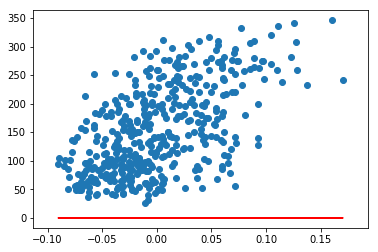

* Il va falloir qu'on calcule les gradients pour notre variable `model.W` et notre constante `model.b`. Pour cela, il va falloir qu'on revoit nos formules de dérivées. Puisque nous ne sommes pas ici pour faire des mathématiques, nous allons vous donner ces formules. 
  * `derive_model_w = 2/len(y_pred)*np.sum((np.matrix(x) @ (y_pred - y_true)))`
  * `derive_model_b = 2/len(y_pred)*(np.sum(y_pred - y_true))`

  * N'hésitez pas à vous documenter sur cet article si vous souhaitez en savoir plus sur le calcul de la dérivée : [Gradient Descent Derivation](https://mccormickml.com/2014/03/04/gradient-descent-derivation/)


  * En utilisant donc les formules ci-dessus, codez la première fonction `derivative_mse_x` qui prendra les arguments : 
    * `x` --> les valeurs pour votre variable X / `y_pred` --> les valeurs prédites par votre modèle / `y_true` --> les valeurs réelles à prédire


In [52]:
# Calcul de la dérivée pour model.W
 def derivative_mse_x(x, y_pred, y_true):
   derive_model_w = 2/len(y_pred)*np.sum((np.matrix(x) @ (y_pred - y_true)))
   return derive_model_w
derivative_mse_x(diabetes_X, model(diabetes_X), y)

-4.294983834350909

* Testez votre fonction 

-4.296059978389615

* En utilisant donc les formules ci-dessus, codez maintenant la fonction derivative_mse_constant qui prendra les arguments :
    * `y_pred` --> les valeurs prédites par votre modèle / `y_true` --> les valeurs réelles à prédire

In [53]:
# Calcul de la dérivée pour model.b 
def derivative_mse_constant( y_pred, y_true):
  derive_model_b = 2/len(y_pred)*(np.sum(y_pred - y_true))
  return derive_model_b
derivative_mse_constant(model(diabetes_X), y)

-303.0690293506134

* Testez votre fonction 

-305.0042064062768

* Nous allons tenter de voir si nous pouvons minimiser notre fonction de coût en utilisant les deux gradients du dessus. Pour mettre à jour nos variables, nous avons besoin de soustraire leur gradients respectifs. Ex : 
  * `X = X - learning_rate * gradient`

  * Définissez un `learning_rate` à 0.1
  * Tentez d'appliquer votre formule sur `model.W` et `model.b`

In [0]:
def gradient(x, gradient):
  return x - 0.1 * gradient

In [55]:
print("OLD model.W = {}".format(model.a))
model.a = gradient(model.a, derivative_mse_x(diabetes_X, model(diabetes_X), y))
print("NEW model.W = {}".format(model.a))
print("OLD model.b = {}".format(model.b))
model.b = gradient(model.b, derivative_mse_constant(model(diabetes_X), y))
print("NEW model.b = {}".format(model.b))

OLD model.W = 0.24383299252330903
NEW model.W = 0.6733313759583999
OLD model.b = 0.5989694875892297
NEW model.b = 30.905872422650575


OLD model.W = [0.00600516]
OLD model.b = [-0.36861904]
NEW model.W = [0.43561116]
NEW model.b = [30.1318016]


* Calculez à nouveau votre MSE 

In [56]:
mse(model(diabetes_X), y)

20623.12708061701

20812.424450810766

* Notre MSE a beaucoup baissé ! C'est une bonne nouvelle mais le processus de descente de gradient est itératif. Vous devrez donc le faire plusieurs fois avant d'arriver à des prédictions précises. 
  * En faisant une boucle, tentez de répéter le processus d'au-dessus 10000 fois 
  * Affichez toutes les 1000 epochs : la mse, model.W & model.b  

In [0]:
# Définission d'un learning rate et d'un nombre d'itérations 


In [57]:
for i in range(10000):
  model.a = gradient(model.a, derivative_mse_x(diabetes_X, model(diabetes_X), y))
  model.b = gradient(model.b, derivative_mse_constant(model(diabetes_X), y))
  if i % 1000 ==0:
    print("-------------------- Epoch {} --------------------".format(i))
    print("Current Loss = {}".format(mse(model(diabetes_X), y)))
    print("NEW model.W = {}".format(model.a))
    print("NEW model.b = {}".format(model.b))

-------------------- Epoch 0 --------------------
Current Loss = 15330.67629263208
NEW model.W = 1.1026354162335703
NEW model.b = 55.15139477069965
-------------------- Epoch 1000 --------------------
Current Loss = 4713.425604826431
NEW model.W = 346.31644409703216
NEW model.b = 152.13348416289614
-------------------- Epoch 2000 --------------------
Current Loss = 4223.321375985378
NEW model.W = 565.8648790826459
NEW model.b = 152.13348416289634
-------------------- Epoch 3000 --------------------
Current Loss = 4025.08980513718
NEW model.W = 705.4928837932054
NEW model.b = 152.13348416289645
-------------------- Epoch 4000 --------------------
Current Loss = 3944.911440274126
NEW model.W = 794.2932421320364
NEW model.b = 152.1334841628965
-------------------- Epoch 5000 --------------------
Current Loss = 3912.481842079418
NEW model.W = 850.768328612364
NEW model.b = 152.13348416289656
-------------------- Epoch 6000 --------------------
Current Loss = 3899.365101162257
NEW model.W =

In [0]:

  # Calcul de la loss
  
  
  # Mise à jour des variables 
  

  # Affichage des variables mises à jour 
  

-------------------- Epoch 0 --------------------
Current Loss: 20812.424450810766
W = [0.86502276]
b = [54.53213811]
-------------------- Epoch 1000 --------------------
Current Loss: 4714.583707665394
W = [346.16532764]
b = [152.13348416]
-------------------- Epoch 2000 --------------------
Current Loss: 4223.789791745661
W = [565.76877232]
b = [152.13348416]
-------------------- Epoch 3000 --------------------
Current Loss: 4025.2792644123865
W = [705.431762]
b = [152.13348416]
-------------------- Epoch 4000 --------------------
Current Loss: 3944.9880705244404
W = [794.25437]
b = [152.13348416]
-------------------- Epoch 5000 --------------------
Current Loss: 3912.5128365781397
W = [850.74360679]
b = [152.13348416]
-------------------- Epoch 6000 --------------------
Current Loss: 3899.3776374510862
W = [886.66952637]
b = [152.13348416]
-------------------- Epoch 7000 --------------------
Current Loss: 3894.064867221544
W = [909.51762579]
b = [152.13348416]
-------------------- E

* En utilisant `Matplotlib`, visualisez à nouveau votre modèle et vos valeurs réelles 

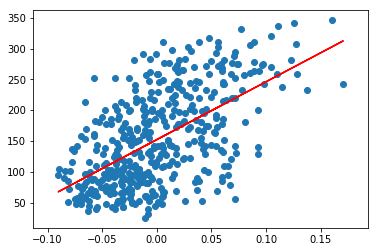

In [58]:
from scipy import stats
plt.scatter(diabetes_X, y)

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(diabetes_X,model(diabetes_X))

line = slope*diabetes_X+intercept
plt.plot(diabetes_X, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.show()

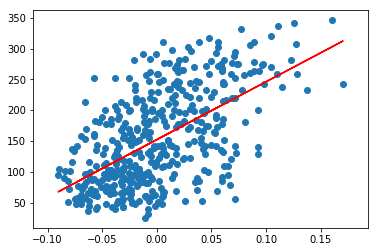

**Nous avons cette fois une belle régression !** 